To build a recommendation system for movies, a dataset with a lot info on movies

Hint: 
- how to combine all info on movies in a string
- recall tfidf vectorizer expect a list of string as input where each string is a document
- transform the strings using Tfidf
- assume query is always an existing movie in database
- recommend other movies based on a movie liked
- compute similarity between the vector of movie said and all other vectors
- sort by similarities
- print top 5 rec

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#import data:
# https://www.kaggle.com/tmdb/tmdb-movie-metadata
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv

--2023-06-11 17:32:05--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: 'tmdb_5000_movies.csv.1'

tmdb_5000_movies.cs 100%[===================>]   5.43M  2.73MB/s    in 2.0s    

2023-06-11 17:32:11 (2.73 MB/s) - 'tmdb_5000_movies.csv.1' saved [5698602/5698602]



In [4]:
data = pd.read_csv("tmdb_5000_movies.csv")
data.head(20)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

### The columns that might be relevant for recommendation: 
- genre
- keywords
- overview
- production_countries
- tagline
- title

desek şimdilik

In [5]:
data_new = data[["genres","keywords","overview", "tagline", "production_countries","title"]]
data_new.head()

,genres,keywords,overview,tagline,production_countries,title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Legend Ends,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","Lost in our world, found in another.","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",John Carter


In [6]:
### aynı olan tekrar eden kelimeler kendini sıfırlıycak o yüzden boşver if falan, sen string'e odaklan.

#her satırın ayrı bi document olmasını istiyorum.

data.iloc[0,1] + data.iloc[0,2]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]http://www.avatarmovie.com/'

In [7]:

for i in range(6):
    data.string 

SyntaxError: invalid syntax (1839111382.py, line 2)

### YAPAMADIM YILDIM HOCANIN ÇÖZÜMÜNE GEÇİYORUZ

we'll need to import also json library since some of data stored in Json format dedi sanki nerden bilcektikse

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [9]:
#to see series and column names:
x = data.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [74]:
data["genres"][0] ##this is a json formatted string

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

Inside a list we have json documents, and each of these items has two keys, id and name

clearly we're interested in name attribute

#### notice some genres have two words, we'll remove the space and treat them as one word

keywords column has much more complex lists and also in the same json format

The following is the code to convert json documents into a format we can use in python

In [10]:
j = json.loads(x["genres"])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [11]:
' '.join(''.join(jj['name'].split()) for jj in j)
#this is the line of code we'll use to convert into single stgin

#what's going on?
#remember j , is a list here, listedeki her jj item'i bir dictionary
#her bi dictionary için name key'sinin karşısındaki value'yu buluyoryz
#hepsini space'ten ayırıyoruz ve boşluksuz birleştiroyruz, 
#sonra en dıştaki join'de bunları boşluklu birbiriyle birleştiriyoruz

'Action Adventure Fantasy ScienceFiction'

In [12]:
## convert the relevant data for each movie into a single string

def genres_keywords_to_string(row):
    genres = json.loads(row["genres"])
    genres = " ".join("".join(i['name'].split()) for i in genres) 
    
    keywords = json.loads(row["keywords"])
    keywords = " ".join("".join(i["name"].split()) for i in keywords)
    
    return "%s %s" % (genres,keywords) #joins the genres and keywords together into a single string

In [13]:
#create a new string rep for each movie

data["string"] = data.apply(genres_keywords_to_string, axis = 1) #burda axis'in bir olması neyi sağlıyo ? ?
data["string"]

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: string, Length: 4803, dtype: object

In [86]:
# create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features=2000) ##2000 burda napıyodu?

In [87]:
X = tfidf.fit_transform(data["string"])
X
#we have2000 columns bcz this is where we set max features

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [88]:
# generate a mapping from the movie title --> index in df
#so that we'll know which vector corresponds to which movie

movie2idx = pd.Series(data.index, index = data["title"]) 
#so this new series will point out movie title as the index
#and the original index as the value

movie2idx


title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [93]:
idx = movie2idx["Scream 3"]
idx

1164

In [94]:
#query:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [95]:
## print query to the vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [96]:
#compute similarity btw query and every vector in X
scores = cosine_similarity(query, X)
scores

array([[0., 0., 0., ..., 0., 0., 0.]])

In [98]:
# currentşy the array is shaped 1 by N we want it to reshape to a 1d array
scores = scores.flatten()
scores

array([0., 0., 0., ..., 0., 0., 0.])

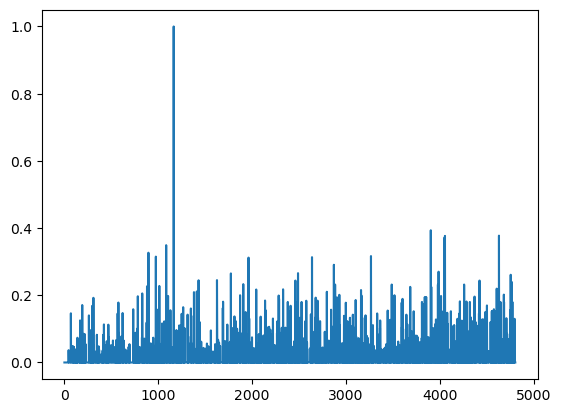

In [99]:
plt.plot(scores)

In [100]:
#we don't care about the score itself, but the rank among them - remember we look for 5 similars
#argsort argument tell which order moveis follow if we sort by score
#negatif sayıya çevirip sıralarsak desc order olmuş olur

(-scores).argsort()

array([1164, 3902, 4628, ..., 1714, 1720, 4802])

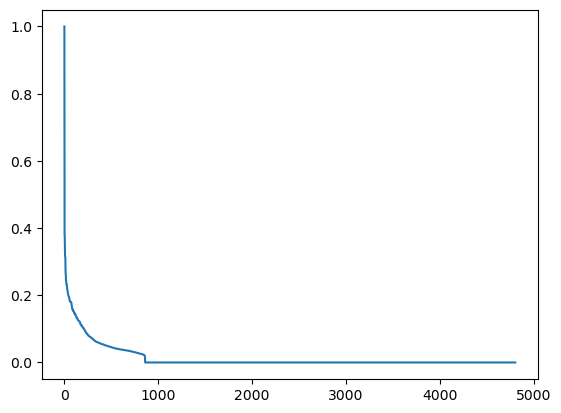

In [101]:
#now we'll plot scores by indexing them with the results from previous array

plt.plot(scores[(-scores).argsort()])


In [102]:
#get top 5 matches but exclude self:

recommend_idx = (-scores).argsort()[1:6]

In [105]:
#convert indices back to titles
data["title"].iloc[recommend_idx]

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

In [106]:
# create a function that generates recommendations:

def recommend(title):
    #get the respective row for the movie with the name title
    idx = movie2idx[title] #gives you the index
    ### Pandas API is a bit inconsistent, if the movie title is same for multiple rows (?), the result won't be a single index
    if type(idx) == pd.Series: #then the result is a pd series
        idx = idx.iloc[0] #we simply grab first item. niye first? #arnitrary miş
        
    #calculate pariwise similarities for this movie:
    query = X[idx]
    scores = cosine_similarity(query, X)
    
    scores = scores.flatten() #1d array
    
    #find 5 most similars:
    recommend_idx = (-scores).argsort()[1:6]
    
    return data["title"].iloc[recommend_idx]

In [108]:
recommend("Scream 3")

3902    Friday the 13th Part VI: Jason Lives
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
1084                         The Glimmer Man
Name: title, dtype: object

In [112]:
print("Recommendations for Mortal Kombat")
print(recommend("Mortal Kombat"))

Recommendations for Mortal Kombat
1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
2237                        Alone in the Dark
Name: title, dtype: object


In [113]:
print("Recommendations for Runaway Bride")
print(recommend("Runaway Bride"))

Recommendations for Runaway Bride
4115                    House of D
2325    My Big Fat Greek Wedding 2
4604         It Happened One Night
3313                  An Education
2689            Our Family Wedding
Name: title, dtype: object
